In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Replace 'your_file.csv' with the path to your CSV file
file_path = 'C:/Users/tmasilo/OneDrive - PPS/Documents/Personal Info/Masters(Big Data Science)/MIT 805/HI-Large_Trans.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Now 'df' contains your CSV data as a DataFrame
# You can perform various operations on the DataFrame

# For example, you can print the first few rows of the DataFrame
print(df.head())

          Timestamp  From Bank    Account  To Bank  Account.1  \
0  2022/08/01 00:17         20  800104D70       20  800104D70   
1  2022/08/01 00:02       3196  800107150     3196  800107150   
2  2022/08/01 00:17       1208  80010E430     1208  80010E430   
3  2022/08/01 00:03       1208  80010E650       20  80010E6F0   
4  2022/08/01 00:02       1208  80010E650       20  80010EA30   

   Amount Received Receiving Currency  Amount Paid Payment Currency  \
0          6794.63          US Dollar      6794.63        US Dollar   
1          7739.29          US Dollar      7739.29        US Dollar   
2          1880.23          US Dollar      1880.23        US Dollar   
3      73966883.00          US Dollar  73966883.00        US Dollar   
4      45868454.00          US Dollar  45868454.00        US Dollar   

  Payment Format  Is Laundering  
0   Reinvestment              0  
1   Reinvestment              0  
2   Reinvestment              0  
3         Cheque              0  
4         Ch

In [10]:
# Map Phase
# Create a mapping of (Payment Format, (Amount Paid, Count))
mapping = df.groupby('Payment Format')['Amount Paid'].agg(['sum', 'count']).reset_index()
mapping.rename(columns={'sum': 'Amount Paid', 'count': 'Count'}, inplace=True)

# Reduce Phase
# Calculate the total Amount Paid and count for each Payment Format
reduced_data = mapping.groupby('Payment Format').agg({'Amount Paid': 'sum', 'Count': 'sum'}).reset_index()

print(reduced_data)

  Payment Format   Amount Paid     Count
0            ACH  1.922500e+14  22126214
1        Bitcoin  3.139920e+09   3905021
2           Cash  1.371037e+14  18412981
3         Cheque  3.368816e+14  70586103
4    Credit Card  2.979723e+12  50856118
5   Reinvestment  1.732191e+13   7410556
6           Wire  2.760774e+13   6405236


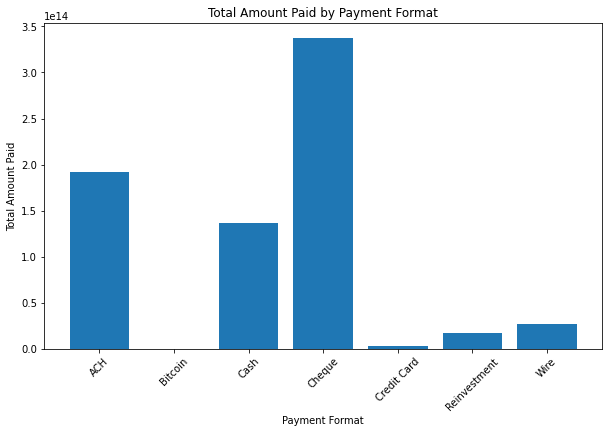

In [11]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(reduced_data['Payment Format'], reduced_data['Amount Paid'])
plt.xlabel('Payment Format')
plt.ylabel('Total Amount Paid')
plt.title('Total Amount Paid by Payment Format')
plt.xticks(rotation=45)

plt.show()

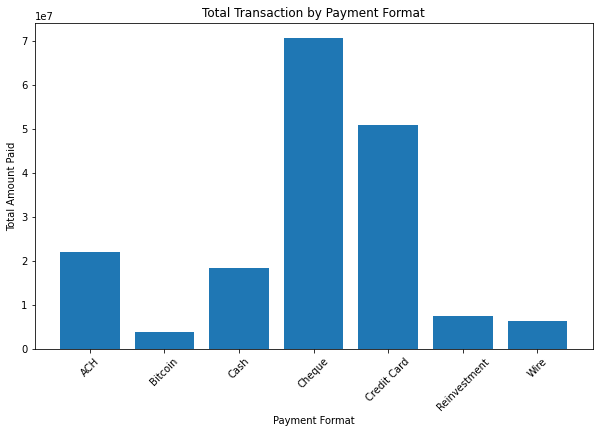

In [12]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(reduced_data['Payment Format'], reduced_data['Count'])
plt.xlabel('Payment Format')
plt.ylabel('Total Amount Paid')
plt.title('Total Transaction by Payment Format')
plt.xticks(rotation=45)

plt.show()

In [16]:
# Map Phase
# Create a mapping of ('Is Laundering', ('Amount Paid', 'Count'))
mapping = df.groupby('Is Laundering')['Amount Paid'].agg(['sum', 'count']).reset_index()
mapping.rename(columns={'sum': 'Amount Paid', 'count': 'Count'}, inplace=True)

# Reduce Phase
# Calculate the total Amount Paid and count for each Is Laundering
reduced_data_Laundering = mapping.groupby('Is Laundering').agg({'Amount Paid': 'sum', 'Count': 'sum'}).reset_index()

print(reduced_data_Laundering)

   Is Laundering   Amount Paid      Count
0              0  6.990399e+14  179476683
1              1  1.510780e+13     225546


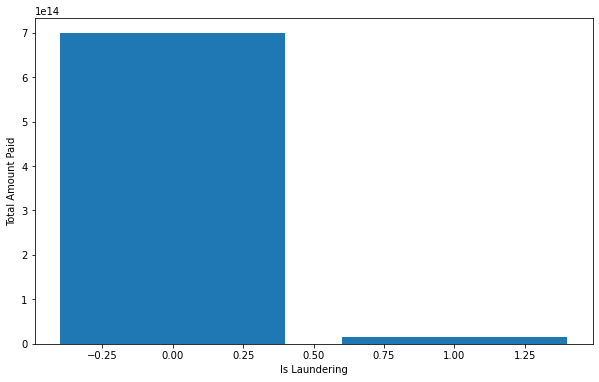

In [19]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(reduced_data_Laundering['Is Laundering'], reduced_data_Laundering['Amount Paid'])
plt.xlabel('Is Laundering')
plt.ylabel('Total Amount Paid')
plt.show()

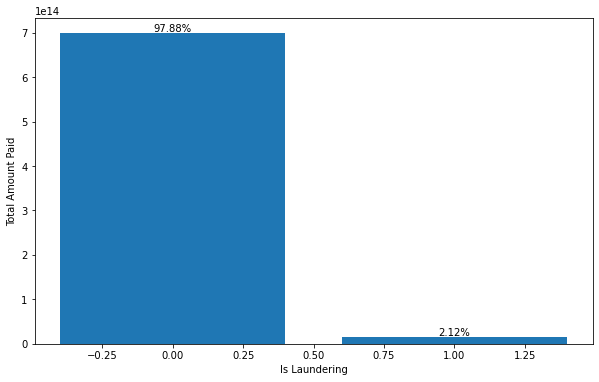

In [33]:
# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(reduced_data_Laundering['Is Laundering'], reduced_data_Laundering['Amount Paid'])
plt.xlabel('Is Laundering')
plt.ylabel('Total Amount Paid')

# Add percentages to the bars
total_amount = sum(reduced_data_Laundering['Amount Paid'])
for bar in bars:
    percentage = (bar.get_height() / total_amount) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

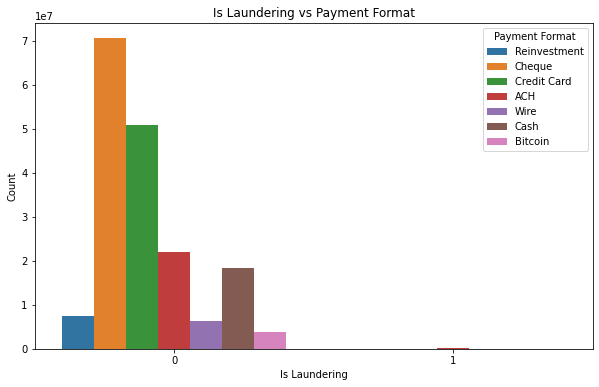

In [27]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Is Laundering', hue='Payment Format')
plt.xlabel('Is Laundering')
plt.ylabel('Count')
plt.title('Is Laundering vs Payment Format')
plt.show()

In [28]:
# Create the matrix table
matrix_table = pd.crosstab(df['Is Laundering'], df['Payment Format'])

# Display the matrix table
print(matrix_table)

Payment Format       ACH  Bitcoin      Cash    Cheque  Credit Card  \
Is Laundering                                                        
0               21927050  3903413  18409318  70572843     50848272   
1                 199164     1608      3663     13260         7846   

Payment Format  Reinvestment     Wire  
Is Laundering                          
0                    7410556  6405231  
1                          0        5  


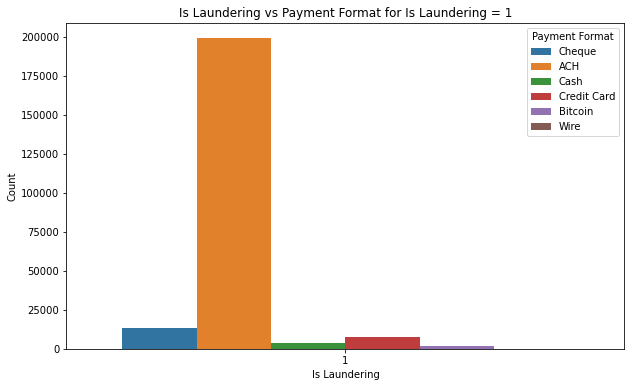

In [30]:
# Filter the data where 'Is Laundering' is equal to 1
filtered_data = df[df['Is Laundering'] == 1]

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='Is Laundering', hue='Payment Format')
plt.xlabel('Is Laundering')
plt.ylabel('Count')
plt.title('Is Laundering vs Payment Format for Is Laundering = 1')
plt.show()

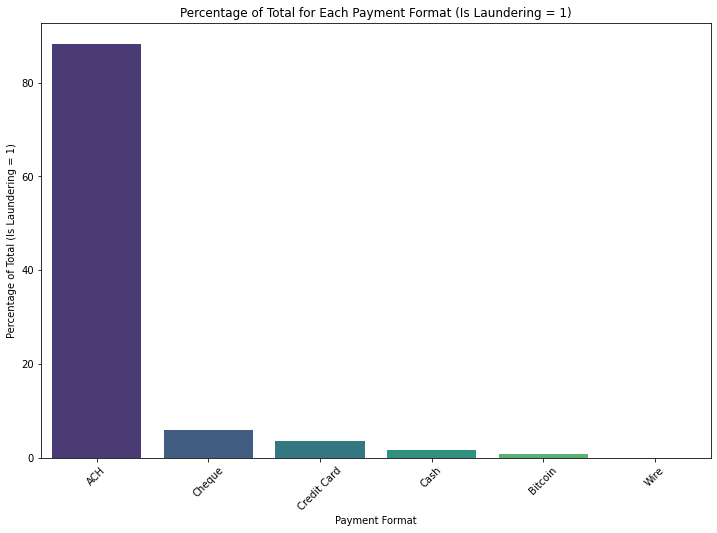

In [35]:
# Filter the data where 'Is Laundering' is equal to 1
filtered_data = df[df['Is Laundering'] == 1]

# Calculate the count of each Payment Format
payment_counts = filtered_data['Payment Format'].value_counts()

# Calculate the total count of Is Laundering = 1 transactions
total_count = len(filtered_data)

# Calculate the percentage of each Payment Format
percentage = payment_counts / total_count * 100

# Create a percentage stacked bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=payment_counts.index, y=percentage, palette='viridis')
plt.xlabel('Payment Format')
plt.ylabel('Percentage of Total (Is Laundering = 1)')
plt.title('Percentage of Total for Each Payment Format (Is Laundering = 1)')
plt.xticks(rotation=45)
plt.show()


In [31]:
# Create the matrix table
matrix_table = pd.crosstab(df['Is Laundering'], df['Payment Currency'])

# Display the matrix table
print(matrix_table)

Payment Currency  Australian Dollar  Bitcoin  Brazil Real  Canadian Dollar  \
Is Laundering                                                                
0                           5177085  3902784      3542992          6072037   
1                              5212     1608         1806             3532   

Payment Currency      Euro  Mexican Peso    Ruble    Rupee  Saudi Riyal  \
Is Laundering                                                             
0                 41151266       4735630  5482198  4155432      3179598   
1                    63086          2165     9089     5249         1442   

Payment Currency   Shekel  Swiss Franc  UK Pound  US Dollar      Yen      Yuan  
Is Laundering                                                                   
0                 7928817      4756903   5728690   65749439  4810184  13103628  
1                    4615         2326     10221      90439     7288     17468  


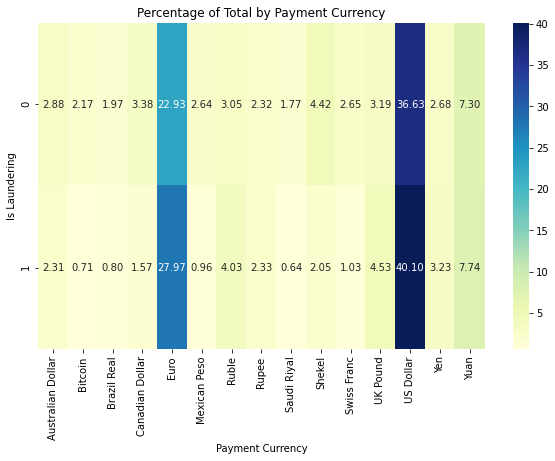

In [39]:
# Create the matrix table
matrix_table = pd.crosstab(df['Is Laundering'], df['Payment Currency'])

# Function to calculate the percentage of the total
def calculate_percentage(row):
    total = row.sum()
    return (row / total * 100).round(2)

# Apply the percentage calculation function to each row
percentage_matrix = matrix_table.apply(calculate_percentage, axis=1)

# Create a heatmap plot
plt.figure(figsize=(10, 6))
sns.heatmap(percentage_matrix, annot=True, fmt=".2f", cmap="YlGnBu")
plt.xlabel('Payment Currency')
plt.ylabel('Is Laundering')
plt.title('Percentage of Total by Payment Currency')
plt.show()

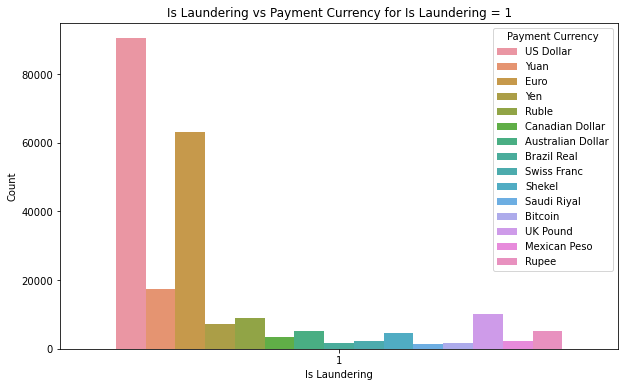

In [32]:
# Filter the data where 'Is Laundering' is equal to 1
filtered_data = df[df['Is Laundering'] == 1]

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='Is Laundering', hue='Payment Currency')
plt.xlabel('Is Laundering')
plt.ylabel('Count')
plt.title('Is Laundering vs Payment Currency for Is Laundering = 1')
plt.show()

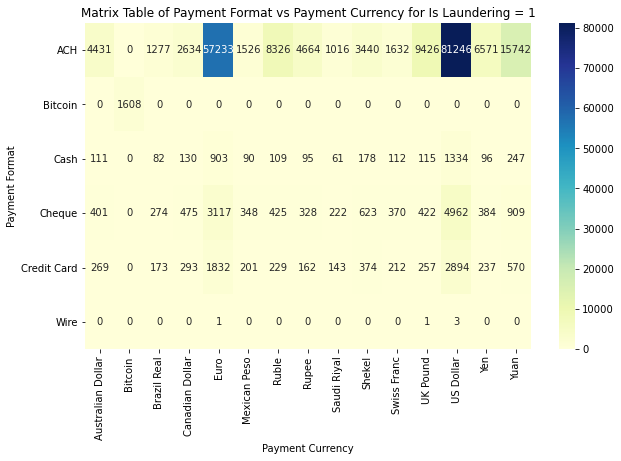

In [40]:
# Filter the data where 'Is Laundering' is equal to 1
filtered_data = df[df['Is Laundering'] == 1]

# Create the matrix table
matrix_table = pd.crosstab(filtered_data['Payment Format'], filtered_data['Payment Currency'])

# Create a heatmap plot
plt.figure(figsize=(10, 6))
sns.heatmap(matrix_table, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Payment Currency')
plt.ylabel('Payment Format')
plt.title('Matrix Table of Payment Format vs Payment Currency for Is Laundering = 1')
plt.show()